In [48]:
from imageio import imread
import matplotlib.pyplot as plt
from skimage import filters, morphology, color, exposure
import numpy as np

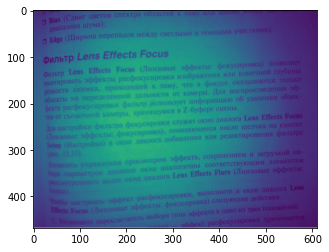

In [114]:
img = color.rgb2gray(imread('test_img.ppm'))
def normalize(img): 
    return (255 * (img - np.min(img)) / (np.max(img) - np.min(img))).astype('uint8')
img = normalize(img)
plt.imshow(img)

In [141]:
#1. reduce noise
gaussed = normalize(filters.gaussian(filters.gaussian(img)))
#2. edges
edged = normalize(filters.prewitt(gaussed))
#3. yolo it
otsu = filters.threshold_otsu(edged)
local_otsu = filters.rank.otsu(edged, morphology.selem.disk(15))
otsud = img > otsu
local_otsud = img > local_otsu
li_threshold = filters.thresholding.threshold_li(edged)
#meaned = img > mean_threshold
lid = (edged > li_threshold).astype(int)
hist, _ = np.histogram(img, range(256))
local_th = filters.threshold_local(edged, 99)
final = edged > local_th

<BarContainer object of 255 artists>

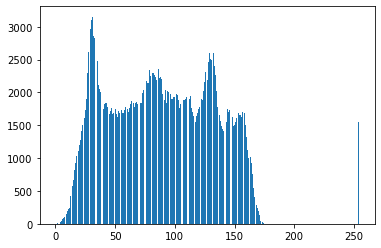

In [93]:
plt.bar(range(len(hist)), hist)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 576x360 with 8 Axes>,
 array([<AxesSubplot:title={'center':'Original'}>,
        <AxesSubplot:title={'center':'Isodata'}>,
        <AxesSubplot:title={'center':'Li'}>,
        <AxesSubplot:title={'center':'Mean'}>,
        <AxesSubplot:title={'center':'Minimum'}>,
        <AxesSubplot:title={'center':'Otsu'}>,
        <AxesSubplot:title={'center':'Triangle'}>,
        <AxesSubplot:title={'center':'Yen'}>], dtype=object))

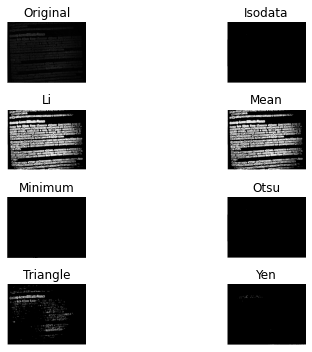

In [80]:
filters.try_all_threshold(edged)

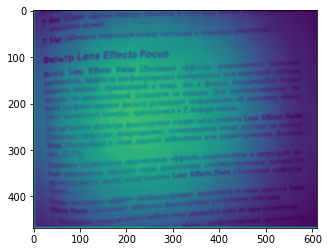

In [68]:
plt.imshow(gaussed)

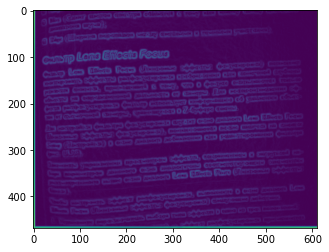

In [69]:
plt.imshow(edged)

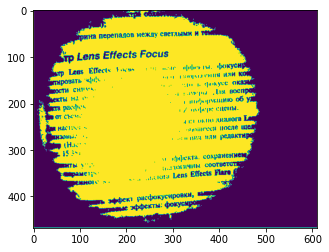

In [70]:
plt.imshow(otsud)

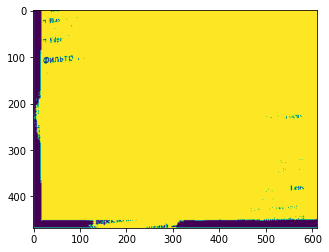

In [74]:
plt.imshow(local_otsud)

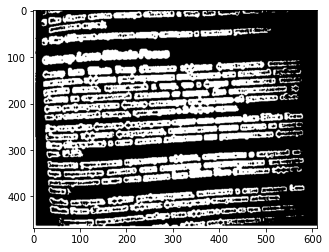

In [124]:
plt.imshow(morphology.binary_closing((img * lid)), cmap='gray')

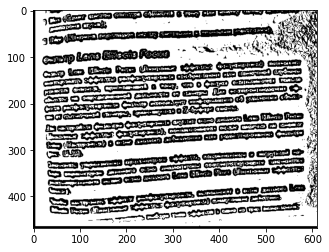

In [144]:
plt.imshow(-1*final, cmap='gray')